In [1]:
from google.colab import output
output.clear()

# III-Project Groupe 3 (Vincent Guerin, Valentin Gempp Alone Hayat)

## Problem Formalisation

The goal of this project is to **predict the sentiment** (`Sentiment`) associated with financial news.

Each record in the dataset represents a financial news article along with market context (event, index, sector, impact level, related company).

### Objective:
Predict whether the sentiment of a given financial news item is:
- **Positive**
- **Negative**
- **Neutral**

### Type of Machine Learning problem:
- **Supervised Classification (Multiclass)**

### Input features (X):
- Market and event metadata, such as:
  - `Market_Event`
  - `Market_Index`
  - `Impact_Level`
  - `Sector`
  - `Related_Company`
  - `Trading_Volume`
  - `Index_Change_Percent`

### Target (y):
- `Sentiment`

### Expected outcome:
A trained classification model capable of predicting the sentiment of financial news based on its contextual market information.


# 1. Descriptive analysis of your data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('financial_news_events.csv')

print("Shape of the dataset:", df.shape)
print("\nColumns in the dataset:", df.columns.tolist())
print("\nFirst 5 rows of the dataset:\n", df.head())


Shape of the dataset: (3024, 12)

Columns in the dataset: ['Date', 'Headline', 'Source', 'Market_Event', 'Market_Index', 'Index_Change_Percent', 'Trading_Volume', 'Sentiment', 'Sector', 'Impact_Level', 'Related_Company', 'News_Url']

First 5 rows of the dataset:
          Date                                           Headline  \
0  2025-05-21        Nikkei 225 index benefits from a weaker yen   
1  2025-05-18  Government subsidy program gives a lift to the...   
2  2025-06-25  New housing data release shows a slowdown in m...   
3  2025-07-21  Massive stock buyback program announced by a c...   
4  2025-07-23  Government spending bill is expected to stimul...   

                    Source                Market_Event        Market_Index  \
0           Times of India       Commodity Price Shock                 DAX   
1          Financial Times        Central Bank Meeting  Shanghai Composite   
2  The Hindu Business Line  Consumer Confidence Report  Shanghai Composite   
3            Th

In [ ]:
print("\nMissing values per column:\n", df.isnull().sum())

print("\nData types of each column:\n", df.dtypes)



Missing values per column:
 Date                      0
Headline                148
Source                    0
Market_Event              0
Market_Index              0
Index_Change_Percent    161
Trading_Volume            0
Sentiment               171
Sector                    0
Impact_Level              0
Related_Company           0
News_Url                153
dtype: int64

Data types of each column:
 Date                     object
Headline                 object
Source                   object
Market_Event             object
Market_Index             object
Index_Change_Percent    float64
Trading_Volume          float64
Sentiment                object
Sector                   object
Impact_Level             object
Related_Company          object
News_Url                 object
dtype: object



Descriptive statistics for numerical columns:
        Index_Change_Percent  Trading_Volume
count           2863.000000     3024.000000
mean              -0.021753      249.037917
std                2.851991      145.497932
min               -4.990000        1.060000
25%               -2.450000      120.427500
50%               -0.100000      244.020000
75%                2.475000      377.000000
max                5.000000      499.830000


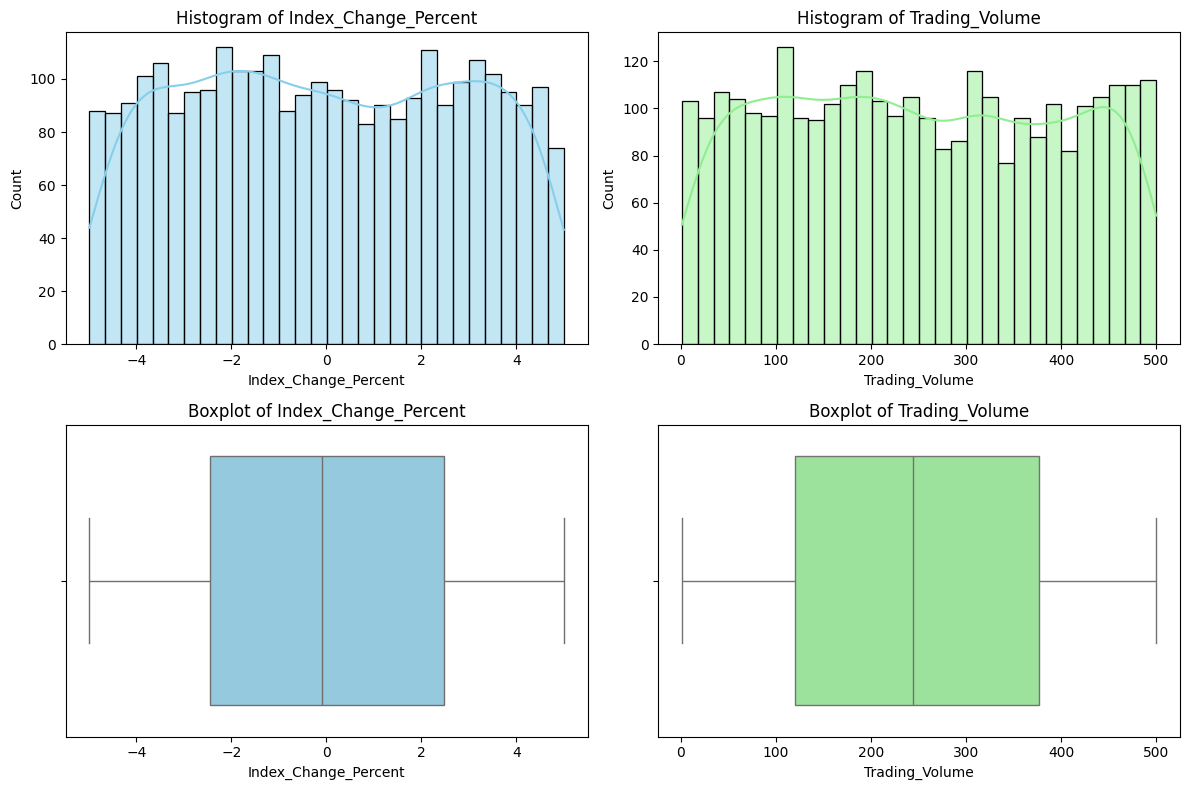

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


print("\nDescriptive statistics for numerical columns:\n",
      df[['Index_Change_Percent', 'Trading_Volume']].describe())


fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.histplot(df['Index_Change_Percent'], bins=30, kde=True, ax=axes[0,0], color='skyblue')
axes[0,0].set_title("Histogram of Index_Change_Percent")

sns.histplot(df['Trading_Volume'], bins=30, kde=True, ax=axes[0,1], color='lightgreen')
axes[0,1].set_title("Histogram of Trading_Volume")

sns.boxplot(x=df['Index_Change_Percent'], ax=axes[1,0], color='skyblue')
axes[1,0].set_title("Boxplot of Index_Change_Percent")

sns.boxplot(x=df['Trading_Volume'], ax=axes[1,1], color='lightgreen')
axes[1,1].set_title("Boxplot of Trading_Volume")

plt.tight_layout()
plt.show()



Column: Sentiment
Sentiment
Negative    974
Neutral     951
Positive    928
Name: count, dtype: int64
----


/tmp/ipython-input-4111330385.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


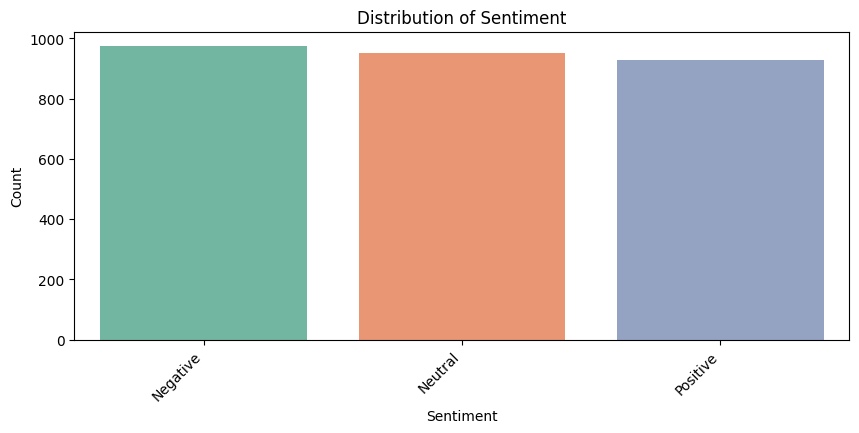


Column: Impact_Level
Impact_Level
Medium    1039
Low       1020
High       965
Name: count, dtype: int64
----


/tmp/ipython-input-4111330385.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


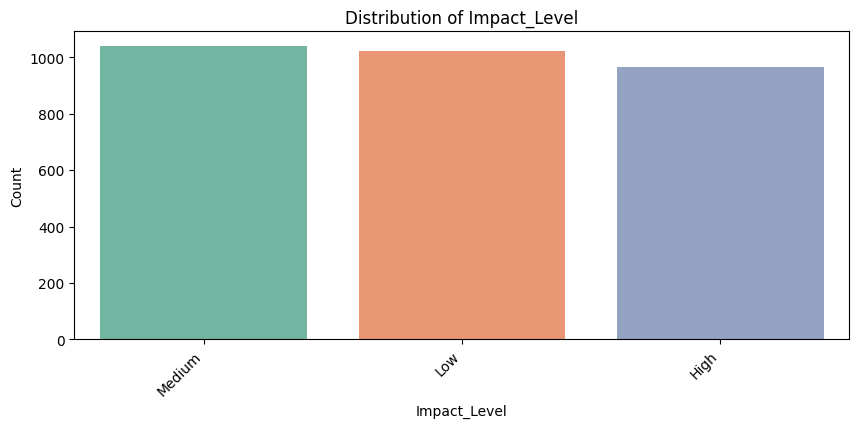

/tmp/ipython-input-4111330385.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')



Column: Sector
Sector
Transportation           184
Agriculture              182
Technology               180
Automotive               178
Materials                176
Industrials              175
Utilities                171
Real Estate              169
Media & Entertainment    168
Energy                   167
Aerospace & Defense      167
Retail                   162
Telecommunications       161
Healthcare               160
Construction             159
Consumer Goods           159
Finance                  154
Pharmaceuticals          152
Name: count, dtype: int64
----


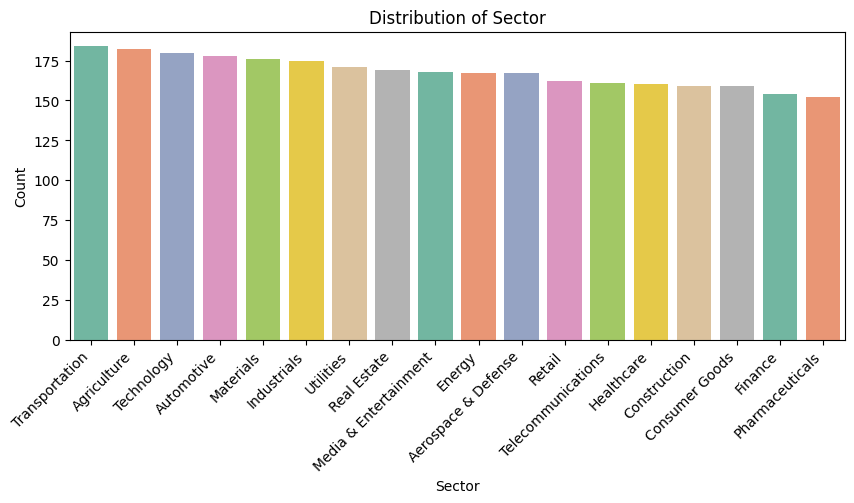


Column: Market_Event
Market_Event
Market Rally                      183
Commodity Price Shock             169
Interest Rate Change              165
Corporate Earnings Report         163
Government Policy Announcement    163
Regulatory Changes                155
Central Bank Meeting              155
Economic Data Release             155
Trade Tariffs Announcement        153
Major Merger/Acquisition          152
Unemployment Rate Announcement    147
Consumer Confidence Report        144
Inflation Data Release            144
Bond Market Fluctuation           144
Supply Chain Disruption           143
IPO Launch                        143
Geopolitical Event                140
Currency Devaluation              137
Stock Market Crash                136
Cryptocurrency Regulation         133
Name: count, dtype: int64
----


/tmp/ipython-input-4111330385.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


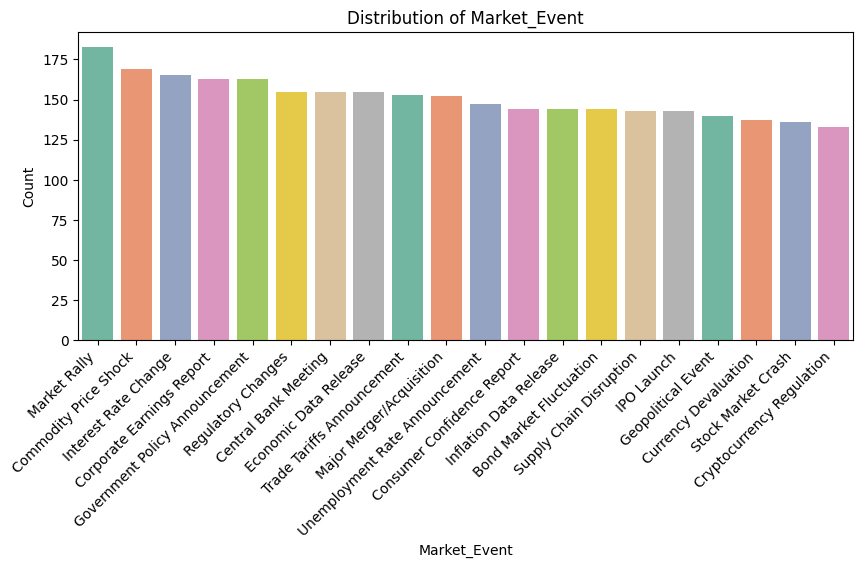


Column: Market_Index
Market_Index
Dow Jones             198
S&P 500               187
Hang Seng             184
Russell 2000          183
Shanghai Composite    182
TSX                   179
Nasdaq Composite      175
Euro Stoxx 50         172
KOSPI                 170
Nikkei 225            166
IBOVESPA              164
CAC 40                163
S&P/TSX Composite     161
ASX 200               159
NSE Nifty             154
DAX                   146
FTSE 100              143
BSE Sensex            138
Name: count, dtype: int64
----


/tmp/ipython-input-4111330385.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


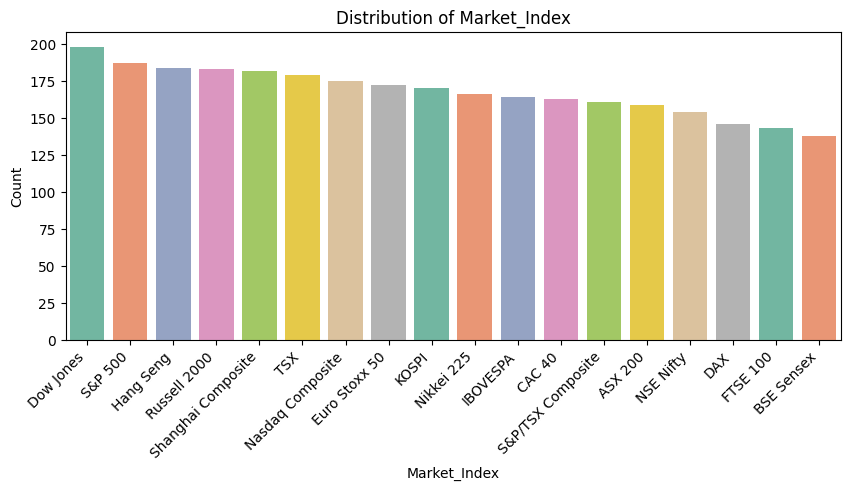

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Sentiment', 'Impact_Level', 'Sector', 'Market_Event', 'Market_Index']

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())
    print("----")


    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


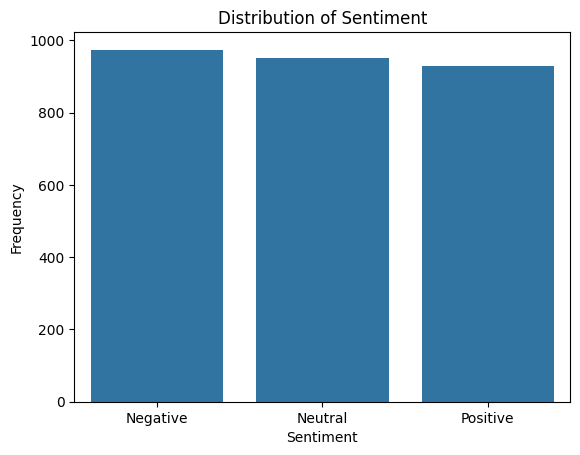

In [ ]:
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


/tmp/ipython-input-2364093182.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Impact_Level', order=df['Impact_Level'].value_counts().index, palette='Set2')


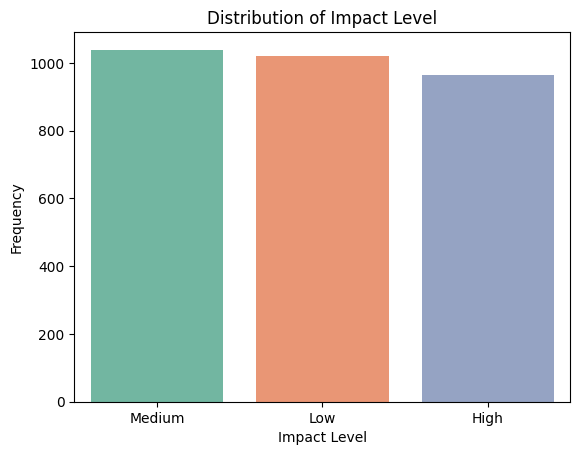

In [ ]:
sns.countplot(data=df, x='Impact_Level', order=df['Impact_Level'].value_counts().index, palette='Set2')
plt.title('Distribution of Impact Level')
plt.xlabel('Impact Level')
plt.ylabel('Frequency')
plt.show()


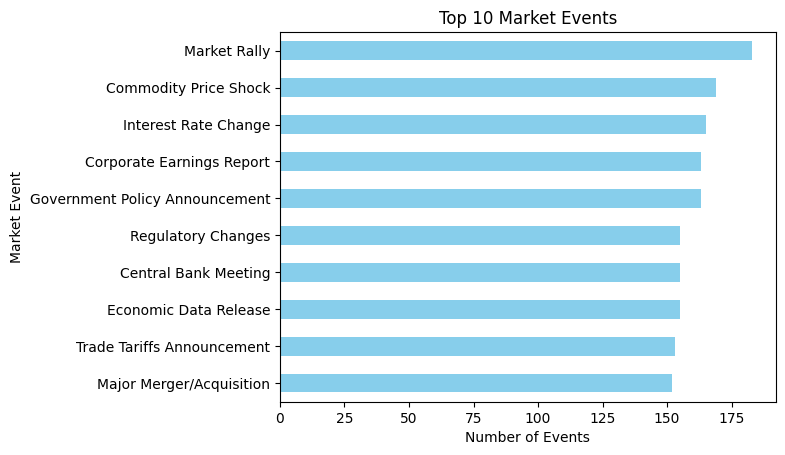

In [ ]:
df['Market_Event'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Market Events')
plt.xlabel('Number of Events')
plt.ylabel('Market Event')
plt.gca().invert_yaxis()
plt.show()


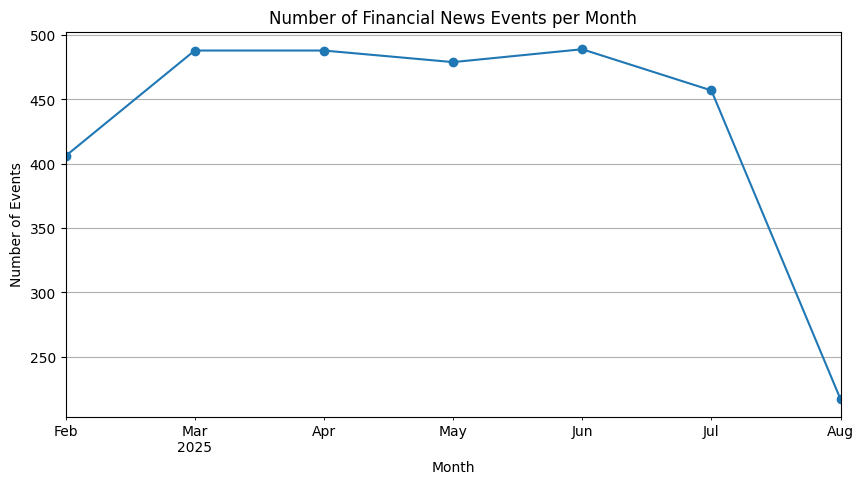

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])


monthly_events = df.groupby(df['Date'].dt.to_period('M')).size()

monthly_events.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Number of Financial News Events per Month')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()


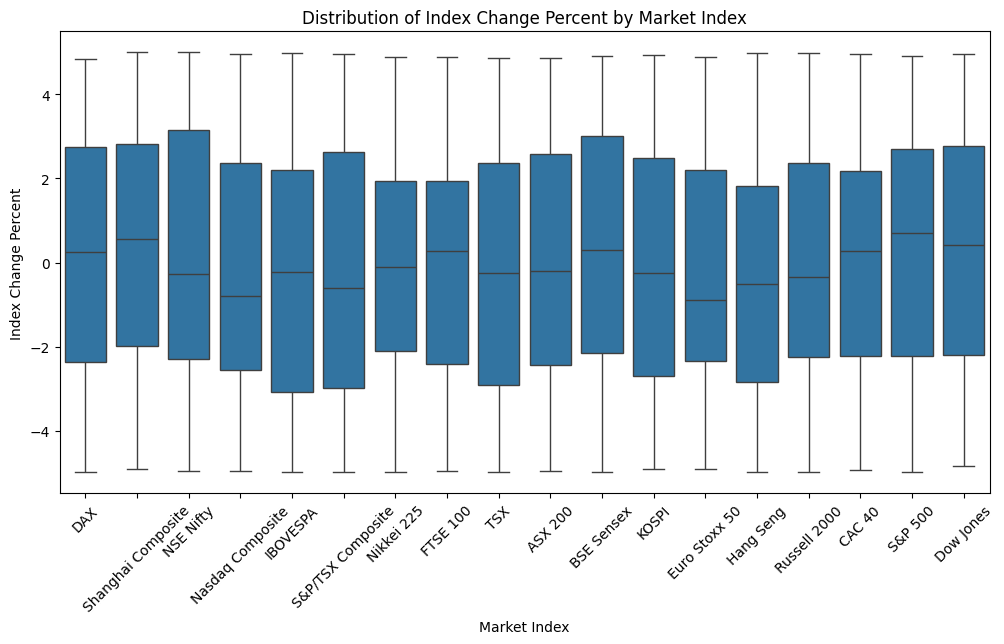

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Market_Index', y='Index_Change_Percent')
plt.title('Distribution of Index Change Percent by Market Index')
plt.xlabel('Market Index')
plt.ylabel('Index Change Percent')
plt.xticks(rotation=45)
plt.show()


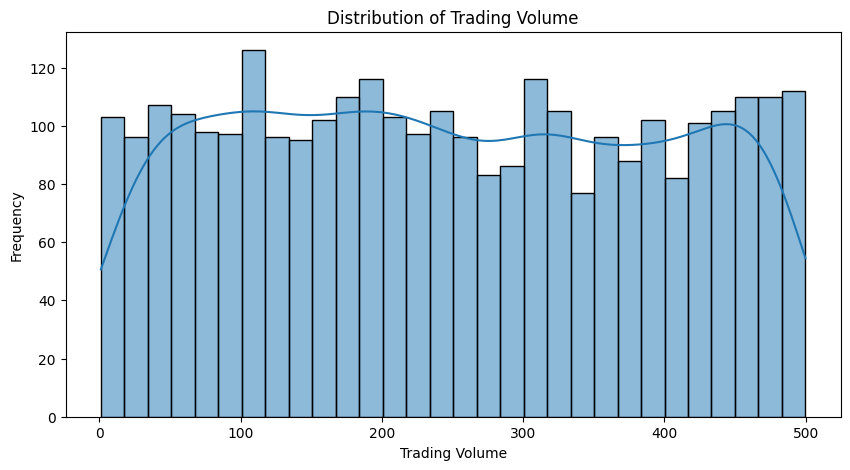

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Trading_Volume'], bins=30, kde=True)
plt.title('Distribution of Trading Volume')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.show()


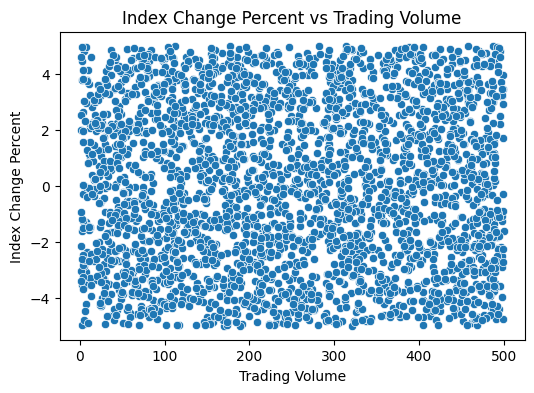

In [ ]:
# Correlation between Index Change Percent and Trading Volume
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Trading_Volume', y='Index_Change_Percent')
plt.title('Index Change Percent vs Trading Volume')
plt.xlabel('Trading Volume')
plt.ylabel('Index Change Percent')
plt.show()


# 2. Implementation of the necessary pre-processing

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

df = df.dropna(subset=['Sentiment']).reset_index(drop=True)

df = df.dropna(subset=['Headline']).reset_index(drop=True)

imputer = SimpleImputer(strategy='median')
df[['Trading_Volume', 'Index_Change_Percent']] = imputer.fit_transform(
    df[['Trading_Volume', 'Index_Change_Percent']]
)


df = df.drop(columns=['News_Url'])


print("Dataset shape after preprocessing:", df.shape)
print("Missing values per column:\n", df.isna().sum())


Dataset shape after preprocessing: (2714, 11)
Missing values per column:
 Date                    0
Headline                0
Source                  0
Market_Event            0
Market_Index            0
Index_Change_Percent    0
Trading_Volume          0
Sentiment               0
Sector                  0
Impact_Level            0
Related_Company         0
dtype: int64


In [ ]:
categorical_cols = ['Impact_Level', 'Sector', 'Market_Event', 'Market_Index', 'Related_Company']
label_encoders = {}

for col in categorical_cols + ['Sentiment']:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le



# Detailed Explanation of FinBERT for Financial Headline Sentiment Analysis

## Objective of FinBERT

FinBERT is a **pre-trained language model based on the BERT architecture**, specifically designed for the **financial domain**. It was developed to understand the complex language used in financial reports, news articles, and other market communications.

- **Why a specialized model?**  
  Financial language contains domain-specific terms and expressions that differ from everyday language (e.g., *bullish*, *bearish*, *downgrade*, *upgrade*).  
  Standard BERT models trained on general-purpose text may misinterpret these nuances.  
  FinBERT is pre-trained on large-scale financial corpora, enabling it to accurately capture sentiment specific to financial contexts.

- **Objective in this project:**  
  Generate an additional feature called **`FinBERT_Prediction`** from financial headlines.  
  This feature encodes the detected sentiment (**Negative, Neutral, Positive**) for each headline.  
  It can then be combined with tabular features such as `Trading_Volume`, `Index_Change_Percent`, `Sector_encoded`, etc., to improve the performance of supervised classification models.

---

## How FinBERT Works

### 1. BERT Architecture
- FinBERT is built on **BERT (Bidirectional Encoder Representations from Transformers)**.
- It uses **bidirectional attention** to understand the context of a word by considering both the **preceding and following words**.
- Each word is transformed into a contextualized vector representation (embedding) that captures semantic meaning.

### 2. Sequence Classification
- The model is fine-tuned for **text classification** tasks.
- It outputs a vector of **logits** corresponding to each sentiment class: **Negative, Neutral, Positive**.
- The predicted class is selected using the `argmax` operation on these logits.

### 3. Tokenization and Encoding
- Each headline is converted into tokens that the model can process.
- **Padding** and **truncation** are applied to ensure uniform sequence lengths across inputs.

### 4. Inference
- Sentiment predictions are generated without computing gradients (`torch.no_grad()`), improving inference efficiency.
- The predicted classes are mapped to human-readable labels and added to the DataFrame as a new feature.


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch
from tqdm import tqdm
import re


def clean_text(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'http\S+', '', text)
    return text.strip()

df['Headline'] = df['Headline'].apply(clean_text)

tokenizer = AutoTokenizer.from_pretrained("yiyanghkust/finbert-tone")
model = AutoModelForSequenceClassification.from_pretrained("yiyanghkust/finbert-tone")
model.eval()


class NewsDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=64)
    def __len__(self):
        return len(self.encodings['input_ids'])
    def __getitem__(self, idx):
        return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

dataset = NewsDataset(df['Headline'].tolist())
loader = DataLoader(dataset, batch_size=32, shuffle=False)

predictions = []

with torch.no_grad():
    for batch in tqdm(loader):
        outputs = model(**{k: v for k, v in batch.items()})
        preds = torch.argmax(outputs.logits, dim=1)
        predictions.extend(preds.cpu().numpy())

label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
df['FinBERT_Prediction'] = [label_map[p] for p in predictions]

df[['Headline', 'FinBERT_Prediction']].head()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]


100%|██████████| 85/85 [02:29<00:00,  1.76s/it]


,Headline,FinBERT_Prediction
0,New housing data release shows a slowdown in m...,Positive
1,Massive stock buyback program announced by a c...,Negative
2,Government spending bill is expected to stimul...,Neutral
3,Central bank maintains status quo on interest ...,Negative
4,Tech Giant's New Product Launch Sparks Sector-...,Neutral


In [ ]:
from sklearn.preprocessing import LabelEncoder

le_finbert = LabelEncoder()
df['FinBERT_Prediction_encoded'] = le_finbert.fit_transform(df['FinBERT_Prediction'])

print(df[['FinBERT_Prediction', 'FinBERT_Prediction_encoded']].head())

  FinBERT_Prediction  FinBERT_Prediction_encoded
0           Positive                           2
1           Negative                           0
2            Neutral                           1
3           Negative                           0
4            Neutral                           1


In [ ]:
df.head()

,Date,Headline,Source,Market_Event,Market_Index,Index_Change_Percent,Trading_Volume,Sentiment,Sector,Impact_Level,Related_Company,Impact_Level_encoded,Sector_encoded,Market_Event_encoded,Market_Index_encoded,Related_Company_encoded,Sentiment_encoded,FinBERT_Prediction,FinBERT_Prediction_encoded
0,2025-06-25,New housing data release shows a slowdown in m...,The Hindu Business Line,Consumer Confidence Report,Shanghai Composite,-0.05,403.22,Neutral,Retail,Medium,Boeing,2,13,3,16,1,1,Positive,2
1,2025-07-21,Massive stock buyback program announced by a c...,The Economist,Commodity Price Shock,NSE Nifty,-2.29,100.11,Positive,Consumer Goods,Low,Samsung Electronics,1,4,2,10,7,2,Negative,0
2,2025-07-23,Government spending bill is expected to stimul...,The Motley Fool,Inflation Data Release,Nasdaq Composite,-3.97,438.22,Negative,Consumer Goods,Low,JP Morgan Chase,1,4,11,11,4,0,Neutral,1
3,2025-03-18,Central bank maintains status quo on interest ...,Bloomberg,Unemployment Rate Announcement,IBOVESPA,0.56,36.24,Negative,Transportation,Low,ExxonMobil,1,16,19,8,2,0,Negative,0
4,2025-03-02,Tech Giant's New Product Launch Sparks Sector-...,Barron's,IPO Launch,Shanghai Composite,-3.68,273.35,Neutral,Telecommunications,Medium,JP Morgan Chase,2,15,10,16,4,1,Neutral,1


🔹 Correlation with Sentiment_encoded (excluding target itself):

Related_Company_encoded       0.018637
Impact_Level_encoded         -0.001689
FinBERT_Prediction_encoded   -0.005429
Index_Change_Percent         -0.005919
Market_Index_encoded         -0.007658
Trading_Volume               -0.008974
Sector_encoded               -0.013327
Market_Event_encoded         -0.037130
Name: Sentiment_encoded, dtype: float64


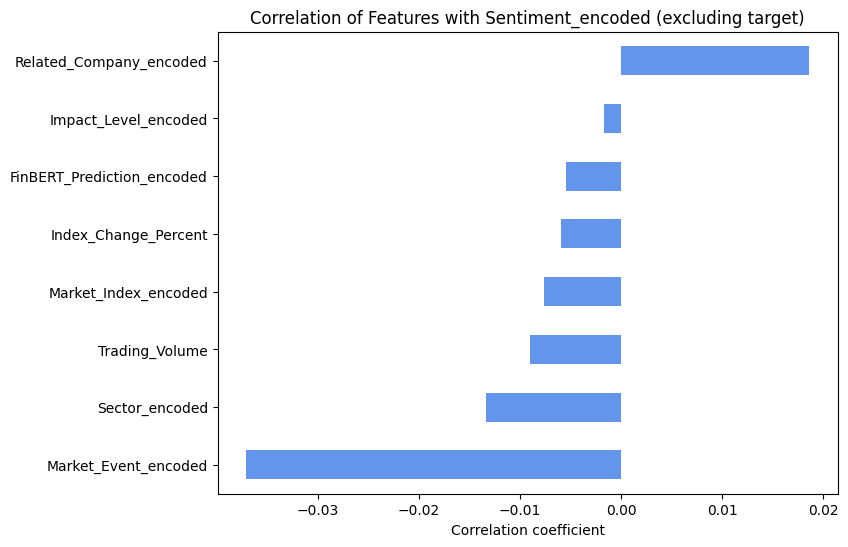

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

y = df['Sentiment_encoded']

all_features = df.drop(columns=['Sentiment_encoded'])
X = all_features.select_dtypes(include=['float64', 'int64'])

corr = df.corr(numeric_only=True)['Sentiment_encoded'].sort_values(ascending=False)

corr = corr.drop('Sentiment_encoded', errors='ignore')

print("🔹 Correlation with Sentiment_encoded (excluding target itself):\n")
print(corr)

plt.figure(figsize=(8,6))
corr.plot(kind='barh', color='cornflowerblue')
plt.gca().invert_yaxis()
plt.title("Correlation of Features with Sentiment_encoded (excluding target)")
plt.xlabel("Correlation coefficient")
plt.show()




                      Feature   F_score   p_value
4        Market_Event_encoded  1.888606  0.151482
5        Market_Index_encoded  1.564686  0.209342
0        Index_Change_Percent  1.379714  0.251827
6     Related_Company_encoded  0.897754  0.407605
3              Sector_encoded  0.242826  0.784425
7  FinBERT_Prediction_encoded  0.174629  0.839778
1              Trading_Volume  0.121643  0.885469
2        Impact_Level_encoded  0.017733  0.982424


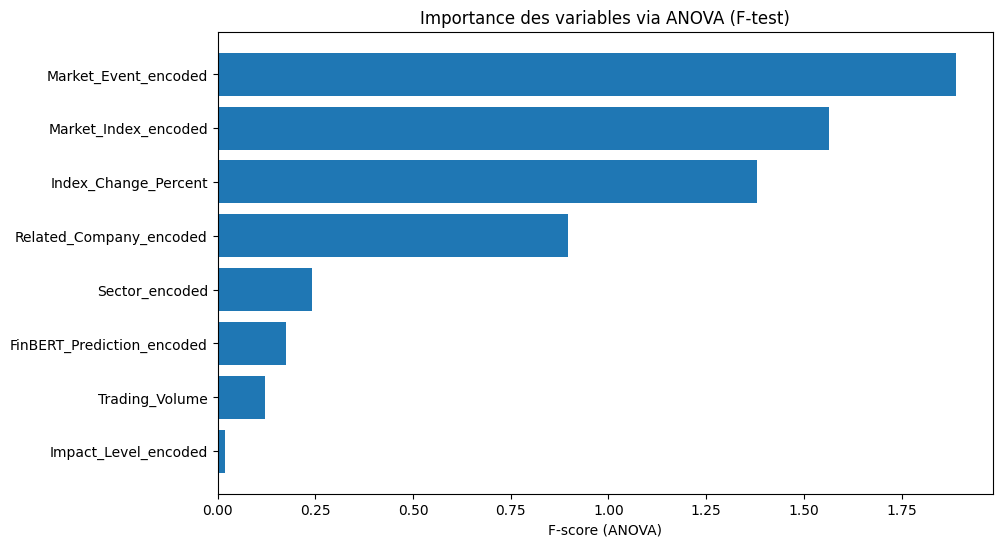

In [ ]:
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import pandas as pd

y = df['Sentiment_encoded']

all_features = df.drop(columns=['Sentiment_encoded'])
X = all_features.select_dtypes(include=['float64', 'int64'])

f_scores, p_values = f_classif(X, y)


anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F_score': f_scores,
    'p_value': p_values
})

anova_df = anova_df.sort_values(by='F_score', ascending=False)

print(anova_df)

plt.figure(figsize=(10,6))
plt.barh(anova_df['Feature'], anova_df['F_score'])
plt.gca().invert_yaxis()
plt.xlabel('F-score (ANOVA)')
plt.title('Importance des variables via ANOVA (F-test)')
plt.show()


# Explanation of Mutual Information (MI)

## Objective of Mutual Information

**Mutual Information (MI)** is a metric that measures **the dependency between a feature and the target variable**.

- In our project:
  - Target (`y`): `Sentiment_encoded` (0 = Negative, 1 = Neutral, 2 = Positive)
  - Features (`X`): all numerical and encoded columns in the dataset (Trading Volume, Index Change, FinBERT Prediction, etc.)

- **Core idea**:
  - MI = 0 → the feature provides **no information** about the target.
  - MI > 0 → the feature contains **useful information** for predicting the target.
  - The higher the MI value, the more **important the feature is for classification**.


                      Feature  Mutual_Information
7  FinBERT_Prediction_encoded            0.030820
5        Market_Index_encoded            0.008383
3              Sector_encoded            0.007231
4        Market_Event_encoded            0.005372
6     Related_Company_encoded            0.003593
2        Impact_Level_encoded            0.000000
0        Index_Change_Percent            0.000000
1              Trading_Volume            0.000000


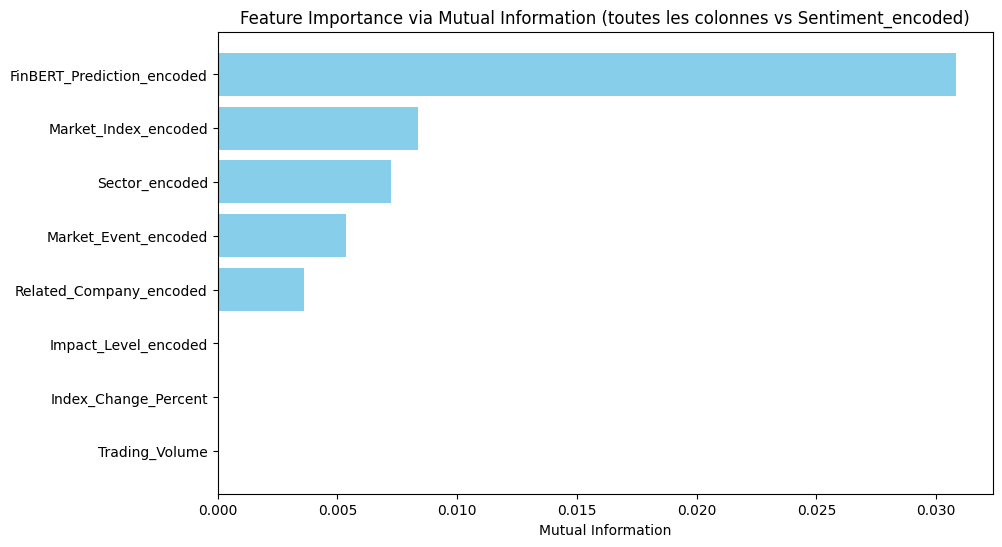

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

y = df['Sentiment_encoded']

all_features = df.drop(columns=['Sentiment_encoded'])
X = all_features.select_dtypes(include=['float64', 'int64'])

mi = mutual_info_classif(X, y, discrete_features='auto', random_state=42)


mi_df_all = pd.DataFrame({'Feature': X.columns, 'Mutual_Information': mi})
mi_df_all = mi_df_all.sort_values(by='Mutual_Information', ascending=False)


print(mi_df_all)

plt.figure(figsize=(10,6))
plt.barh(mi_df_all['Feature'], mi_df_all['Mutual_Information'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Mutual Information')
plt.title('Feature Importance via Mutual Information (toutes les colonnes vs Sentiment_encoded)')
plt.show()


Shape after PCA: (2714, 3)
Explained variance ratio: [0.13436207 0.13311279 0.12751065]


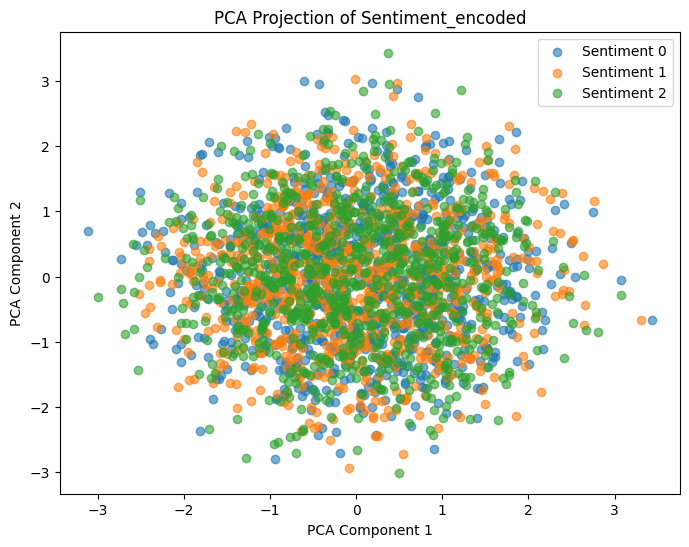

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

num_cols = ['Trading_Volume', 'Index_Change_Percent', 'FinBERT_Prediction_encoded'] + \
           [col + '_encoded' for col in categorical_cols if col != 'Sentiment']

X = df[num_cols]
y = df['Sentiment_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("Shape after PCA:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(8,6))
for sentiment, color in zip([0, 1, 2], ['red', 'green', 'blue']):
    plt.scatter(X_pca[y==sentiment, 0], X_pca[y==sentiment, 1],
                label=f'Sentiment {sentiment}', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Sentiment_encoded")
plt.legend()
plt.show()


# Explanation of Linear Discriminant Analysis (LDA)

## Objective of LDA

**Linear Discriminant Analysis (LDA)** is a **supervised dimensionality reduction technique**.  
Unlike PCA, which maximizes the overall variance of the data without considering class labels, LDA aims to **maximize the separation between classes**.

In our project:

- The **classes** are `Sentiment_encoded` (0 = Negative, 1 = Neutral, 2 = Positive).
- The **features** include all numerical and encoded columns in the dataset (`Trading_Volume`, `Index_Change_Percent`, `FinBERT_Prediction_encoded`, etc.).

### Mathematical Principle

1. Compute the **mean of each class** and the **within-class variance**.
2. Find the projection vectors that **maximize the ratio of between-class variance to within-class variance**.
3. Project the data into a space of dimension `n_classes - 1` (here, 2).

### Result

In the resulting 2D space, data points from different classes are **as well separated as possible**, making class discrimination more effective.


Shape after LDA: (2714, 2)


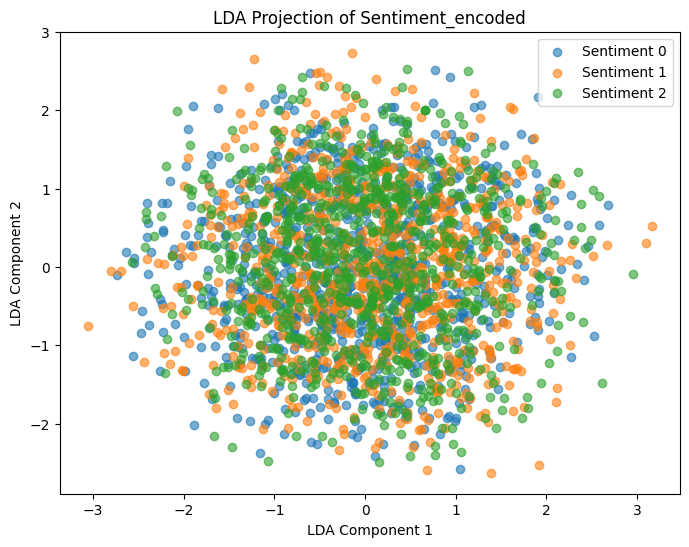

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


num_cols = ['Trading_Volume', 'Index_Change_Percent', 'FinBERT_Prediction_encoded'] + \
           [col + '_encoded' for col in categorical_cols if col != 'Sentiment']

X = df[num_cols]
y = df['Sentiment_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- LDA ---
lda = LinearDiscriminantAnalysis(n_components=2)  # max = n_classes - 1
X_lda = lda.fit_transform(X_scaled, y)

print("Shape after LDA:", X_lda.shape)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for sentiment, color in zip([0, 1, 2], ['red', 'green', 'blue']):
    plt.scatter(X_lda[y==sentiment, 0], X_lda[y==sentiment, 1],
                label=f'Sentiment {sentiment}', alpha=0.6)
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA Projection of Sentiment_encoded")
plt.legend()
plt.show()


# 4. Selection of a baseline model and implementation of the model.

In [ ]:
# --- X_scaled  ---
print("\n=== Logistic Regression avec X_scaled ===")
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

logreg_scaled = LogisticRegression(max_iter=1000, random_state=42)
logreg_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = logreg_scaled.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test_scaled, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test_scaled, y_pred_scaled))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_scaled, y_pred_scaled))


=== Logistic Regression avec X_scaled ===
Accuracy: 0.3149171270718232

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.44      0.38       185
           1       0.30      0.27      0.28       181
           2       0.31      0.23      0.26       177

    accuracy                           0.31       543
   macro avg       0.31      0.31      0.31       543
weighted avg       0.31      0.31      0.31       543


Confusion Matrix:
 [[82 56 47]
 [87 48 46]
 [81 55 41]]


In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# --- X_pca  ---
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

logreg_pca = LogisticRegression(max_iter=1000, random_state=42)
logreg_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = logreg_pca.predict(X_test_pca)

print("=== Logistic Regression avec PCA ===")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print("\nClassification Report:\n", classification_report(y_test_pca, y_pred_pca))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_pca))


=== Logistic Regression avec PCA ===
Accuracy: 0.34806629834254144

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.61      0.44       185
           1       0.35      0.30      0.33       181
           2       0.32      0.12      0.18       177

    accuracy                           0.35       543
   macro avg       0.34      0.34      0.32       543
weighted avg       0.34      0.35      0.32       543


Confusion Matrix:
 [[112  48  25]
 [104  55  22]
 [103  52  22]]


In [ ]:
# --- X_lda  ---
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X_lda, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



X_train shape: (2171, 2)
X_test shape: (543, 2)
Accuracy: 0.36464088397790057

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.48      0.43       185
           1       0.35      0.32      0.33       181
           2       0.36      0.29      0.32       177

    accuracy                           0.36       543
   macro avg       0.36      0.36      0.36       543
weighted avg       0.36      0.36      0.36       543


Confusion Matrix:
 [[89 52 44]
 [75 58 48]
 [69 57 51]]


# Grid Search

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

logreg = LogisticRegression(max_iter=1000, random_state=42)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

grid_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_logreg.fit(X_train, y_train)

print("Best parameters (Logistic Regression):", grid_logreg.best_params_)


y_pred_lr = grid_logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Best parameters (Logistic Regression): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.3701657458563536

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.51      0.44       185
           1       0.36      0.32      0.34       181
           2       0.36      0.27      0.31       177

    accuracy                           0.37       543
   macro avg       0.37      0.37      0.36       543
weighted avg       0.37      0.37      0.36       543



In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)

param_grid_xgb = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}


grid_xgb = GridSearchCV(xgb_clf, param_grid_xgb, cv=3, scoring='accuracy', verbose=1)
grid_xgb.fit(X_train, y_train)

print("Best parameters (XGBoost):", grid_xgb.best_params_)

y_pred_xgb = grid_xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters (XGBoost): {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}
Accuracy: 0.3425414364640884

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.37      0.37       185
           1       0.34      0.31      0.33       181
           2       0.32      0.34      0.33       177

    accuracy                           0.34       543
   macro avg       0.34      0.34      0.34       543
weighted avg       0.34      0.34      0.34       543



# Bagging

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree_base = DecisionTreeClassifier(random_state=42)
bagging_tree = BaggingClassifier(estimator=tree_base,
                                 n_estimators=50,
                                 max_samples=0.8,
                                 max_features=1.0,
                                 random_state=42,
                                 n_jobs=-1)
bagging_tree.fit(X_train, y_train)

y_pred_bag_tree = bagging_tree.predict(X_test)

print("\nBagging Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_bag_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bag_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bag_tree))


Bagging Decision Tree Results:
Accuracy: 0.3296500920810313

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.41      0.36       185
           1       0.32      0.29      0.31       181
           2       0.34      0.29      0.31       177

    accuracy                           0.33       543
   macro avg       0.33      0.33      0.33       543
weighted avg       0.33      0.33      0.33       543


Confusion Matrix:
 [[75 61 49]
 [77 53 51]
 [74 52 51]]


# Combine several algorithms for ensemble learning decision making

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

num_cols = ['Trading_Volume', 'Index_Change_Percent', 'FinBERT_Prediction_encoded'] + \
           [col + '_encoded' for col in categorical_cols if col != 'Sentiment']

X = df[num_cols]
y = df['Sentiment_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_lda, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression(max_iter=1000, random_state=42)

rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)

xgb_clf = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)



In [ ]:
voting_clf = VotingClassifier(
    estimators=[('lr', logreg), ('rf', rf), ('xgb', xgb_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

y_pred_voting = voting_clf.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:02:04] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Voting Classifier Accuracy: 0.3775322283609576

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.45      0.42       185
           1       0.37      0.31      0.34       181
           2       0.37      0.36      0.37       177

    accuracy                           0.38       543
   macro avg       0.38      0.38      0.38       543
weighted avg       0.38      0.38      0.38       543



# An algorithm outside the scope of the course : Multi-Layer Perceptron

# Explanation of the Multi-Layer Perceptron (MLP)

## Objective

The **Multi-Layer Perceptron (MLP)** is a type of **artificial neural network (ANN)** used for **classification and regression** on tabular data.  
In our project, the MLP can be used to predict the **sentiment of financial news (`Sentiment_encoded`)** by combining:

- **Tabular features**: `Trading_Volume`, `Index_Change_Percent`, `Sector_encoded`, etc.  
- **Text-based features** generated by FinBERT: `FinBERT_Prediction_encoded`.

---

## MLP Architecture

An MLP is composed of multiple **layers of neurons**:

### 1. Input Layer
- Each neuron corresponds to one input feature.
- In our case, the number of neurons equals the number of tabular features plus the text-based features.

### 2. Hidden Layers
- One or more intermediate layers.
- Each neuron performs a **linear combination** of the outputs from the previous layer, followed by a **non-linear activation function** (e.g., ReLU).
- These layers allow the network to **capture complex and non-linear relationships** between features.

### 3. Output Layer
- For multiclass classification (`Sentiment_encoded`), the output layer typically uses a **softmax function**.
- This produces a probability distribution over the sentiment classes: **Negative, Neutral, Positive**.


In [ ]:

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

num_cols = ['Trading_Volume', 'Index_Change_Percent', 'FinBERT_Prediction_encoded'] + \
           [col + '_encoded' for col in categorical_cols if col != 'Sentiment']

X = df[num_cols].values
y = df['Sentiment_encoded'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)  # max = n_classes - 1
X_lda = lda.fit_transform(X_scaled, y)
print("Shape after LDA:", X_lda.shape)  # (n_samples, 2)

X_train, X_test, y_train, y_test = train_test_split(
    X_lda, y, test_size=0.2, random_state=42, stratify=y
)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)


class MLP_LDA(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=16, n_classes=3, dropout=0.2):
        super(MLP_LDA, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, n_classes)
        )

    def forward(self, x):
        return self.model(x)

model = MLP_LDA(input_dim=X_lda.shape[1])

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

n_epochs = 50

for epoch in range(n_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}")


model.eval()
y_preds = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        outputs = model(X_batch)
        preds = torch.argmax(outputs, dim=1)
        y_preds.extend(preds.cpu().numpy())

print("MLP on LDA features Accuracy:", accuracy_score(y_test, y_preds))
print("\nClassification Report:\n", classification_report(y_test, y_preds))



Shape after LDA: (2714, 2)
Epoch [10/50], Loss: 1.0589
Epoch [20/50], Loss: 1.0788
Epoch [30/50], Loss: 1.1294
Epoch [40/50], Loss: 1.0866
Epoch [50/50], Loss: 1.0865
MLP on LDA features Accuracy: 0.35174953959484345

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.35      0.36       185
           1       0.35      0.36      0.35       181
           2       0.34      0.34      0.34       177

    accuracy                           0.35       543
   macro avg       0.35      0.35      0.35       543
weighted avg       0.35      0.35      0.35       543

